<a href="https://colab.research.google.com/github/KimYongHwi/machine-learning-study/blob/main/natural_language_processing/11_CNN_%EC%8A%A4%ED%8C%B8_%EB%A9%94%EC%9D%BC_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', filename='spam.csv')
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

data['v1'] = data['v1'].replace(['ham', 'spam'], [0, 1])
data.head(3)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
data.drop_duplicates(subset=['v2'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int64 
 1   v2      5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


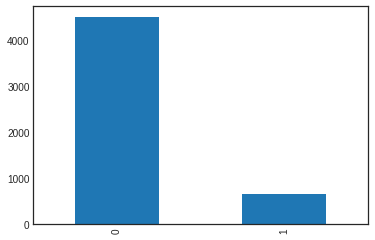

In [ ]:
data['v1'].value_counts().plot(kind='bar')

In [ ]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [ ]:
X_data = data['v2']
y_data = data['v1']

In [ ]:
vocab_size = 1000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_data)

sequences = tokenizer.texts_to_sequences(X_data)

In [ ]:
sequences[:2]

[[47, 433, 780, 705, 662, 64, 8, 94, 121, 434, 142, 68, 57, 137],
 [49, 306, 435, 6]]

In [ ]:
X_data = sequences

print('매일 최대 길이: {}'.format(max(len(l) for l in X_data)))
print('매일 평균 길이: {}'.format((sum(map(len, X_data)) / len(X_data))))

매일 최대 길이: 172
매일 평균 길이: 12.566840781582512


Text(0, 0.5, 'Number of Samples')

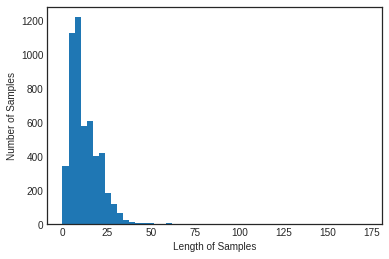

In [ ]:
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')

In [ ]:
max_length = 60
data = pad_sequences(X_data, maxlen=max_length)
print(data.shape)

(5169, 60)


In [ ]:
n_train = int(len(sequences) * 0.8)
n_test = int(len(sequences) - n_train)

print(n_train)
print(n_test)

4135
1034


In [ ]:
X_train = data[:n_train]
y_train = np.array(y_data[:n_train])

X_test = data[n_train:]
y_test = np.array(y_data[n_train:])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4135, 60) (4135,) (1034, 60) (1034,)


**모델생성**

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPool1D, Embedding, Dropout, MaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, strides=1, padding='valid', activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[es, mc]
)

Epoch 1/10
52/52 [==============================] - 2s 15ms/step - loss: 0.4658 - acc: 0.8673 - val_loss: 0.3760 - val_acc: 0.8730
Epoch 2/10
52/52 [==============================] - 1s 10ms/step - loss: 0.3514 - acc: 0.8697 - val_loss: 0.2927 - val_acc: 0.8730
Epoch 3/10
52/52 [==============================] - 1s 11ms/step - loss: 0.1524 - acc: 0.9432 - val_loss: 0.0736 - val_acc: 0.9831
Epoch 4/10
52/52 [==============================] - 1s 11ms/step - loss: 0.0588 - acc: 0.9846 - val_loss: 0.0545 - val_acc: 0.9855
Epoch 5/10
52/52 [==============================] - 1s 11ms/step - loss: 0.0389 - acc: 0.9888 - val_loss: 0.0516 - val_acc: 0.9855
Epoch 6/10
52/52 [==============================] - 1s 11ms/step - loss: 0.0269 - acc: 0.9924 - val_loss: 0.0497 - val_acc: 0.9855
Epoch 7/10
52/52 [==============================] - 1s 11ms/step - loss: 0.0201 - acc: 0.9937 - val_loss: 0.0485 - val_acc: 0.9807
Epoch 8/10
52/52 [==============================] - 1s 11ms/step - loss: 0.0122 - a

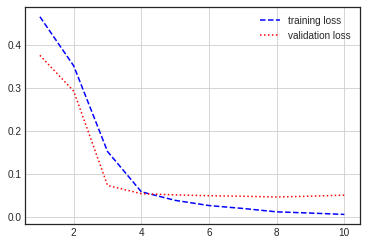

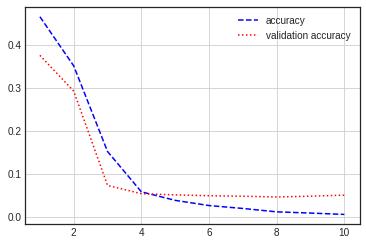

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label='accuracy')
plt.plot(epochs, val_loss, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 0.0582 - acc: 0.9855


[0.058186184614896774, 0.9854932427406311]